# Processamento dos dados de onda e corrente

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
import espec
import matplotlib
%matplotlib inline

In [3]:
#Carrega os dados

pathname = os.environ['HOME'] + '/Dropbox/unimonte/dados_2015/Palmas/'
filename = 'CPSP_2015.xlsx'
filename1 = 'Praticagem_2015.xlsx'

#CPSP
dd = pd.read_excel(pathname + filename, skiprows=4, 
                   header=None, names=['date','int','dir'])
dd = dd.set_index('date')

#Praticagem
dd1 = pd.read_excel(pathname + filename1, skiprows=4,
                    header=None, names=['date','int','dir'])
dd1 = dd1.set_index('date')

In [4]:
#reamostrar a cada 5 minutos (mesma taxa de amostragem dos dados)
dd = dd.resample('300s').mean()
dd1 = dd1.resample('300s').mean()

In [5]:
#preenche com zeros os nan
dd.ix[pl.find(np.isnan(dd.int) == True),:] = 0
dd1.ix[pl.find(np.isnan(dd1.int) == True),:] = 0

In [6]:
#retira uma amostra dos dados
dd = dd.loc['2015-01-02':'2015-12-31']
dd1 = dd1.loc['2015-01-02':'2015-12-31']

In [7]:
#Analise espectral

fs = int(1.0 / (5.0 / 60 / 24)) #frequencia de amostragem (cpd)
nfft = int(len(dd) / 10)

#analise espectral
aa = espec.espec1(dd.int,nfft,fs)
bb = espec.espec1(dd.dir,nfft,fs)

aa1 = espec.espec1(dd1.int,nfft,fs)
bb1 = espec.espec1(dd1.dir,nfft,fs)

#espectro cruzado
ec = espec.espec2(dd.int,dd1.int,nfft,fs)


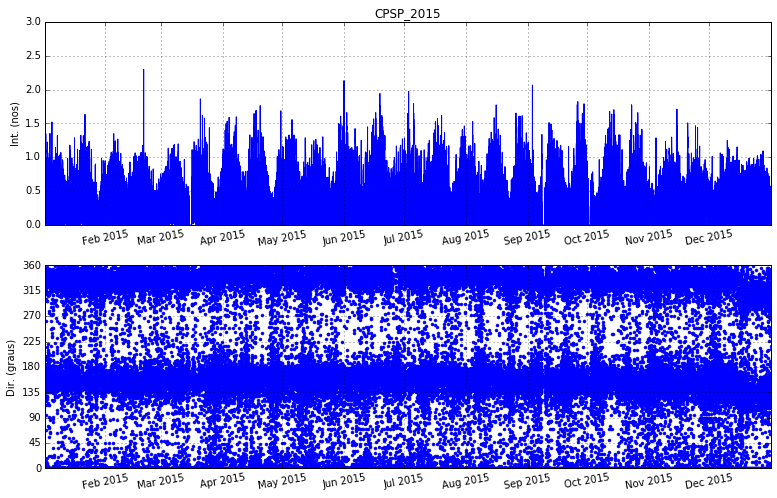

In [8]:

#figuras

pl.figure(figsize=(13,8),facecolor='w')
pl.subplot(211)
pl.title('CPSP_2015')
pl.plot(dd.index,dd.int)
pl.ylabel('Int. (nos)')
pl.xticks(rotation=10)
pl.ylim(0,3)
pl.grid()
pl.subplot(212)
pl.plot(dd.index,dd.dir,'.')
pl.ylabel('Dir. (graus)')
pl.yticks(range(0,360+45,45))
pl.ylim(0,360)
pl.xticks(rotation=10)
pl.grid()
pl.savefig('fig/Int_Dir_CPSP_2015.png')


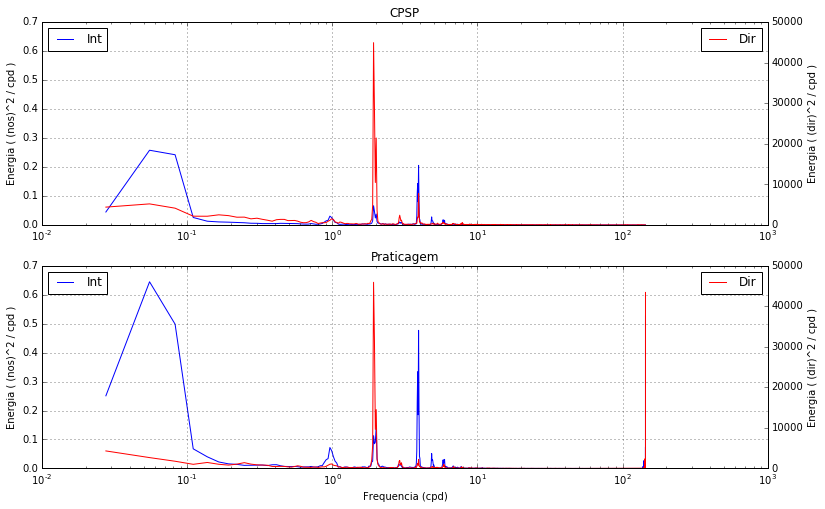

In [9]:

pl.figure(figsize=(13,8),facecolor='w')
pl.subplot(211)
pl.semilogx(aa[:,0],aa[:,1],'b')
pl.title('CPSP')
pl.ylabel('Energia ( (nos)^2 / cpd )')
pl.legend(['Int'],loc=2)
pl.ylim(0,0.7)
pl.grid()
pl.twinx()
pl.semilogx(bb[:,0],bb[:,1],'r')
pl.ylabel('Energia ( (dir)^2 / cpd )')
pl.legend(['Dir'],loc=1)
pl.ylim(0,50000)
# -----------
pl.subplot(212)
pl.semilogx(aa1[:,0],aa1[:,1],'b')
pl.xlabel('Frequencia (cpd)')
pl.title('Praticagem')
pl.ylabel('Energia ( (nos)^2 / cpd )')
pl.legend(['Int'],loc=2)
pl.ylim(0,0.7)
pl.grid()
pl.twinx()
pl.semilogx(bb1[:,0],bb1[:,1],'r')
pl.ylabel('Energia ( (dir)^2 / cpd )')
pl.legend(['Dir'],loc=1)
pl.ylim(0,50000)
pl.savefig('fig/Espec_Int_Dir_CPSP_Prat_2015.png')


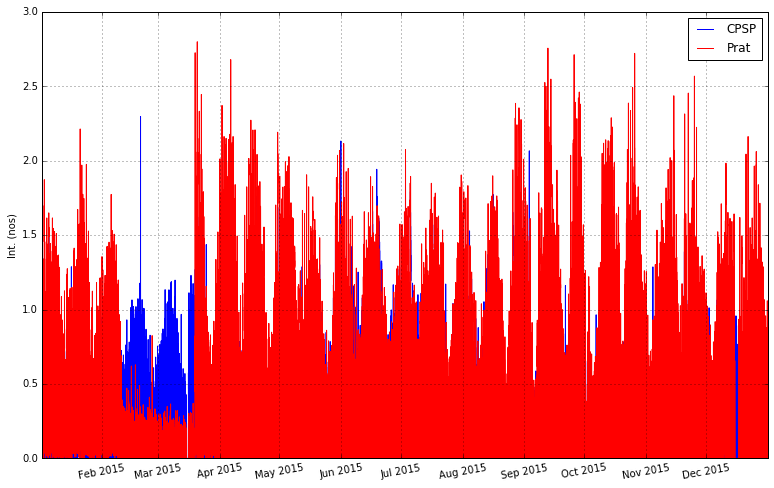

In [10]:

#plota dos dados simultaneos
pl.figure(figsize=(13,8),facecolor='w')
pl.plot(dd.index,dd.int,'b')
pl.plot(dd1.index,dd1.int,'r')
pl.grid()
pl.ylim(0,3)
pl.xticks(rotation=10)
pl.ylabel('Int. (nos)')
pl.legend(['CPSP','Prat'])
pl.savefig('fig/Int_CPSP_Prat_2015.png')


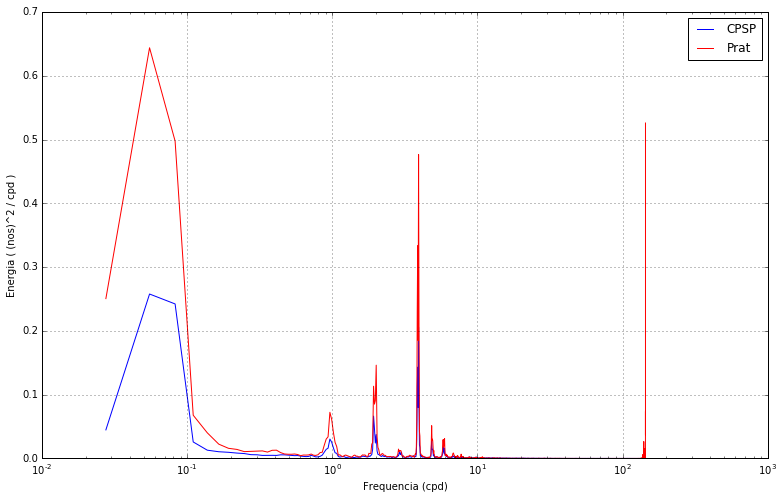

In [11]:

#auto-espectro
pl.figure(figsize=(13,8),facecolor='w')
pl.semilogx(aa[:,0],aa[:,1],'b')
pl.semilogx(aa1[:,0],aa1[:,1],'r')
pl.grid()
pl.ylabel('Energia ( (nos)^2 / cpd )')
pl.xlabel('Frequencia (cpd)')
pl.legend(['CPSP','Prat'])
pl.savefig('fig/Espec_Int_CPSP_Prat_2015.png')


/usr/local/python/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


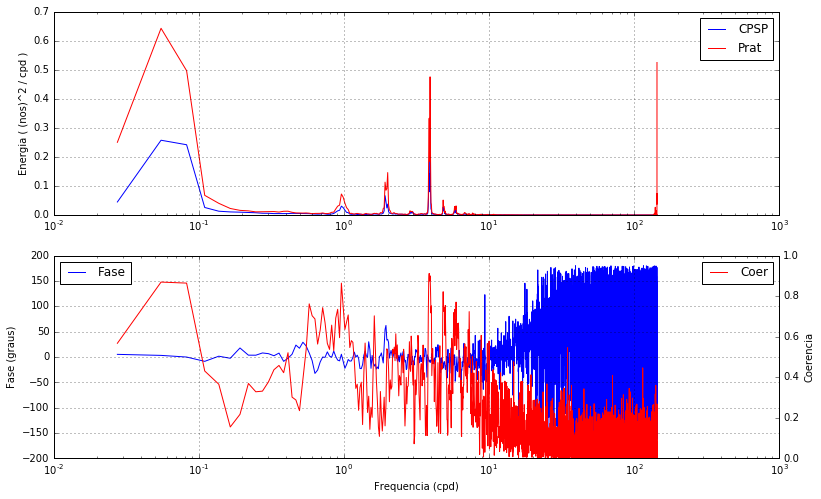

In [12]:

#espectro cruzado (fase e coerencia)
pl.figure(figsize=(13,8),facecolor='w')
pl.subplot(211)
pl.semilogx(aa[:,0],aa[:,1],'b')
pl.semilogx(aa1[:,0],aa1[:,1],'r')
pl.ylabel('Energia ( (nos)^2 / cpd )')
pl.grid()
pl.legend(['CPSP','Prat'])
pl.subplot(212)
pl.semilogx(ec[:,0],ec[:,4],'b')
pl.grid()
pl.ylabel('Fase (graus)')
pl.xlabel('Frequencia (cpd)')
pl.legend(['Fase'],loc=2)
pl.twinx()
pl.semilogx(ec[:,0],ec[:,5],'r')
pl.ylabel('Coerencia')
pl.ylim(0,1)
pl.legend(['Coer'],loc=1)
pl.savefig('fig/EspecCruz_Int_CPSP_Prat_2015.png')